<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Day_17_Social_Ads_Forecasting_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Ads Forecasting Using Linear Regression

In [1]:
# Import Libraries 
import pandas as pd 
import seaborn as sns 

## Import Data

In [2]:
df = pd.read_excel("https://github.com/theleadio/datascience_demo/blob/master/social-ads-raw.xlsx?raw=true")
df.head(10)

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
5,6,8.7,48.9,75.0,7.2,large,suburban
6,7,57.5,32.8,23.5,11.8,large,suburban
7,8,120.2,19.6,11.6,13.2,large,urban
8,9,8.6,2.1,1.0,4.8,large,rural
9,10,199.8,2.6,21.2,10.6,large,suburban


### Linear Regression Plot

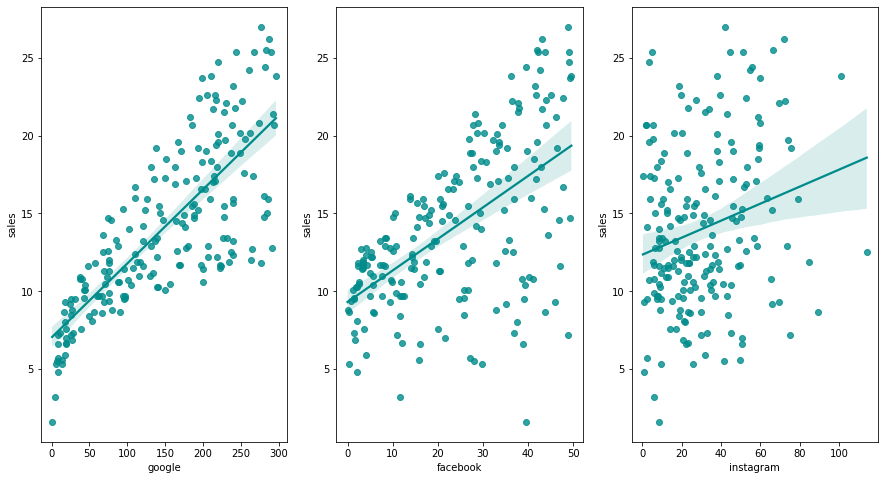

In [3]:
import matplotlib.pyplot as plt 
fig, subs = plt.subplots(1,3, figsize=(15,8))

sns.regplot(data=df, x='google', y='sales', color='darkcyan', ax=subs[0])
sns.regplot(data=df, x='facebook', y='sales', color='darkcyan', ax=subs[1])
sns.regplot(data=df, x='instagram', y='sales', color='darkcyan', ax=subs[2])

## Model Data

In [4]:
columns = ['google']

X = df[columns]
y = df['sales']

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X,y)

LinearRegression()

In [6]:
score = model.score(X,y)
intercept = model.intercept_ 
coef = model.coef_ 

print('R-square Score:', score)
print('Intercept:', intercept)
print('Coefficients:', coef)

R-square Score: 0.611875050850071
Intercept: 7.032593549127695
Coefficients: [0.04753664]


In [7]:
# y = mx + c
unit_price = 5000
(0.04753664 * 20 + 7.032593549127695 * 1000) * unit_price

35167721.40963847

Continue to work on the assignment by:

1. Convert market size and area to numbers
2. Continue to build a linear regression model using the rest of the features.

# Assignment

## Obtain Data

In [8]:
df = pd.read_excel("https://github.com/theleadio/datascience_demo/blob/master/social-ads-raw.xlsx?raw=true")
df.head(10)

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
5,6,8.7,48.9,75.0,7.2,large,suburban
6,7,57.5,32.8,23.5,11.8,large,suburban
7,8,120.2,19.6,11.6,13.2,large,urban
8,9,8.6,2.1,1.0,4.8,large,rural
9,10,199.8,2.6,21.2,10.6,large,suburban


## Scrub Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


In [10]:
# Check the unique items in the data features
print('Unique items in size data feature: ', df['size'].unique())
print('Unique items in area data feature: ', df['area'].unique())

Unique items in size data feature:  ['large' 'small']
Unique items in area data feature:  ['rural' 'urban' 'suburban']


In [11]:
# Market data feature 
df['size_Large'] = df['size'].map({'small':0, 'large':1})
df['size_Large'].unique()

array([1, 0])

In [12]:
# Area data feature
df = pd.get_dummies(data=df, columns=['area'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   segment        200 non-null    int64  
 1   google         200 non-null    float64
 2   facebook       200 non-null    float64
 3   instagram      200 non-null    float64
 4   sales          200 non-null    float64
 5   size           200 non-null    object 
 6   size_Large     200 non-null    int64  
 7   area_rural     200 non-null    uint8  
 8   area_suburban  200 non-null    uint8  
 9   area_urban     200 non-null    uint8  
dtypes: float64(4), int64(2), object(1), uint8(3)
memory usage: 11.6+ KB


## Explore Data 

In [14]:
# Display the descriptive summary
df.describe() 

,segment,google,facebook,instagram,sales,size_Large,area_rural,area_suburban,area_urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.295000,0.390000,0.315000
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.457187,0.488974,0.465682
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000,0.000000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000,1.000000
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000,1.000000


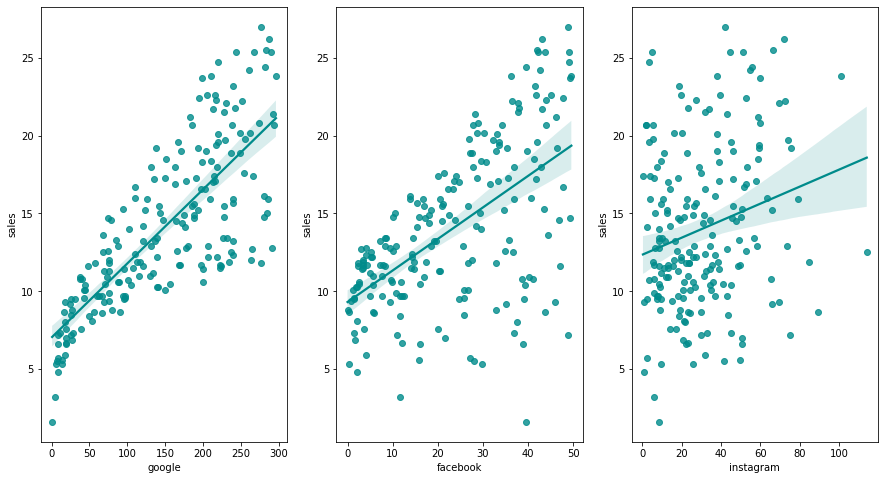

In [15]:
import matplotlib.pyplot as plt 
fig, subs = plt.subplots(1,3, figsize=(15,8))

sns.regplot(data=df, x='google', y='sales', color='darkcyan', ax=subs[0])
sns.regplot(data=df, x='facebook', y='sales', color='darkcyan', ax=subs[1])
sns.regplot(data=df, x='instagram', y='sales', color='darkcyan', ax=subs[2])

## Model Data

In [16]:
columns1 = ["google", "size_Large", "area_rural", "area_suburban", "area_urban"]
columns2 = ["facebook", "size_Large", "area_rural", "area_suburban", "area_urban"]
columns3 = ["instagram", "size_Large", "area_rural", "area_suburban", "area_urban"]

X1 = df[columns1]
X2 = df[columns2]
X3 = df[columns3]
y1 = df['sales']
y2 = df['sales']
y3 = df['sales']

In [17]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(X1, y1)
model2.fit(X2, y2)
model3.fit(X3, y3)

LinearRegression()

In [18]:
score1 = model1.score(X1,y1)
intercept1 = model1.intercept_ 
coef1 = model1.coef_ 

print('Google R-square Score:', score1)
print('Google Intercept:', intercept1)
print('Google Coefficients:', coef1)

Google R-square Score: 0.6189524206463224
Google Intercept: 7.2247560890549405
Google Coefficients: [ 0.04789878 -0.39685988 -0.05529598 -0.42951901  0.48481499]


In [19]:
score2 = model2.score(X2,y2)
intercept2 = model2.intercept_ 
coef2 = model2.coef_ 

print('Facebook R-square Score:', score2)
print('Facebook Intercept:', intercept2)
print('Facebook Coefficients:', coef2)

Facebook R-square Score: 0.3440274303690064
Facebook Intercept: 8.653401862177201
Facebook Coefficients: [ 0.20488509  1.13359315 -0.00679962 -0.1283325   0.13513212]


In [20]:
score3 = model3.score(X3,y3)
intercept3 = model3.intercept_ 
coef3 = model3.coef_ 

print('Instagram R-square Score:', score3)
print('Instagram Intercept:', intercept3)
print('Instagram Coefficients:', coef3)

Instagram R-square Score: 0.059165317179324606
Instagram Intercept: 12.052051933040783
Instagram Coefficients: [ 0.05401448  0.63891304 -0.06135314 -0.34867238  0.41002551]
